# 模型正则化

![8wkAsS.png](https://s1.ax1x.com/2020/03/18/8wkAsS.png)

- 这种正则化方式称为**岭回归（Ridge Regression）**方式

### 1. 准备

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(333)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

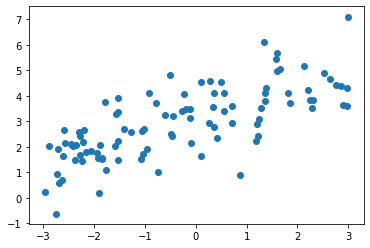

In [3]:
plt.scatter(x, y)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(333)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_pridect = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_pridect)

17.60424903057649

- **可以看出，方差太大，发生过拟合**

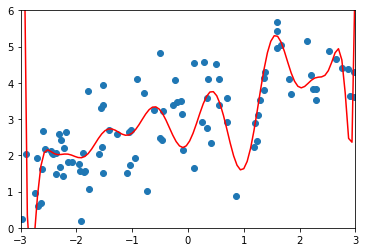

In [7]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color="r")
    plt.axis([-3, 3, 0, 6])

plot_model(poly_reg)

### 1. 岭回归

In [8]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
# 对于岭回归，最后添加的一项是 theta 的平方，所以需要一个很小的 alpha 来调节
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_pridect = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_pridect)

5.145261887298409

- 可以看出，经过岭回归正则化，均方误差变小

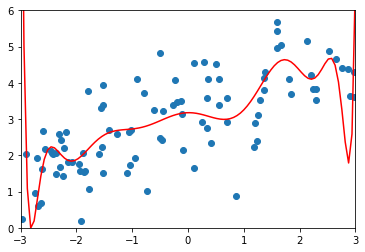

In [9]:
plot_model(ridge1_reg)

In [10]:
# 增大 alpha 的值 为 1
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_pridect = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_pridect)

1.064278521672832

- **可以看到，此时均方误差变得更小**

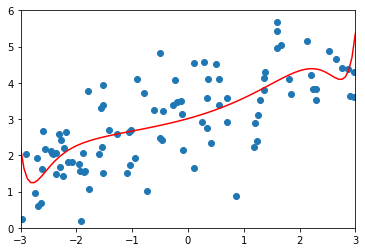

In [11]:
plot_model(ridge2_reg)

### 2. LASSO 回归

![8wkkM8.png](https://s1.ax1x.com/2020/03/18/8wkkM8.png)

In [12]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Lasso(alpha=alpha))
    ])

# 对于Lasso，最后添加的一项是 theta 的绝对值，所以不需要一个很小的 alpha 来调节
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_pridect_lasso = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_pridect_lasso)

1.0115698360481131

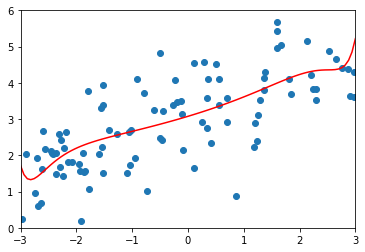

In [13]:
plot_model(lasso1_reg)

In [14]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_pridect_lasso = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_pridect_lasso)

1.0165770336119049

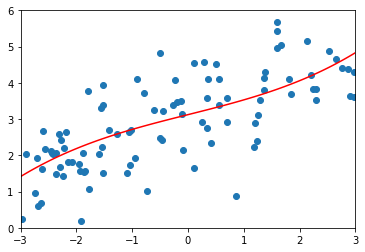

In [15]:
plot_model(lasso2_reg)

In [16]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_pridect_lasso = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_pridect_lasso)

2.094555467186439

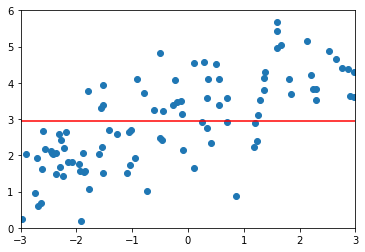

In [17]:
plot_model(lasso3_reg)

### 3. 比较

![8wkPRP.png](https://s1.ax1x.com/2020/03/18/8wkPRP.png)
![8wFzad.png](https://s1.ax1x.com/2020/03/18/8wFzad.png)
![8wkEqg.png](https://s1.ax1x.com/2020/03/18/8wkEqg.png)
![8wkZZQ.png](https://s1.ax1x.com/2020/03/18/8wkZZQ.png)

- Ridge 和 LASSO 衡量正则化
- MSE 和 MAE 衡量模型的好坏
- 欧拉距离 和 曼哈顿距离衡量距离大小

### 4. 弹性网

$$J(\theta) = MSE(y, \hat{y};\theta) + r\alpha \sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^n\theta^2 $$

- 兼具岭回归和 LASSO回归的优势